In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
# Load the uploaded Excel file
file_path = '6threadsCompleto.xlsx'
#Columnas a comparar
columnas = ['Abstaylor', 'Simulated-annealing-joa-parallel']


data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of each sheet to understand the structure of the data
sheet_names = data.keys()
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
sheet_names, data_preview

(dict_keys(['Tiempos', 'Nodos']),
 {'Tiempos':    Problema  Abstaylor  Hill-climbing  Hill-climbing-parallel  \
  0      chem    1802.18        1822.36                 1326.28   
  1    chem-1    1803.55        1817.02                 1312.92   
  2   chembis     861.38         876.53                  671.34   
  3  dualc5\n      71.20          70.60                  103.53   
  4  dualc8\n     291.08         305.19                  469.84   
  
     Simulated-annealing  Simulated-annealing-joa  \
  0              1825.23                  1806.31   
  1              1823.92                  1802.18   
  2               884.47                   870.04   
  3                73.98                    76.26   
  4               306.15                   293.39   
  
     Simulated-annealing-joa-parallel  Simulated-annealing-parallel  
  0                           1340.74                       1713.92  
  1                           1334.82                       2091.77  
  2                

In [162]:
# Obtener la lista de nombres de los problemas y guardarla en una lista
problemas = data['Tiempos']['Problema'].tolist()

# Mostrar la lista de problemas
problemas

['chem',
 'chem-1',
 'chembis',
 'dualc5\n',
 'dualc8\n',
 'ex14_2_7',
 'ex2_1_7',
 'ex2_1_8',
 'ex2_1_9',
 'ex2_1_9bis',
 'ex6_1_3',
 'ex6_1_3bis',
 'ex6_2_10',
 'ex6_2_12',
 'ex6_2_6',
 'ex6_2_8',
 'ex6_2_9',
 'ex8_4_4bis',
 'ex8_5_1bis',
 'himmel16',
 'hs088\n',
 'hs093\n',
 'hs102\n',
 'hs103\n',
 'hs108\n',
 'hs113\n',
 'launch',
 'mistake\n',
 'odfits\n',
 'sambal']

In [163]:
# borrar las demas columnas
for sheet in sheet_names:
    data[sheet] = data[sheet][columnas]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
data_preview


{'Tiempos':    Abstaylor  Simulated-annealing-joa-parallel
 0    1802.18                           1340.74
 1    1803.55                           1334.82
 2     861.38                            684.99
 3      71.20                             66.45
 4     291.08                            268.47,
 'Nodos':    Abstaylor  Simulated-annealing-joa-parallel
 0   905104.8                          906020.4
 1   905104.8                          903202.8
 2   480774.8                          485865.6
 3    54014.8                           54140.4
 4   189155.6                          186863.6}

In [164]:
# Normalizar filas
for sheet in sheet_names:
    data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing-joa-parallel
 0    0.573409                          0.426591
 1    0.574677                          0.425323
 2    0.557034                          0.442966
 3    0.517254                          0.482746
 4    0.520204                          0.479796
 5    0.491670                          0.508330
 6    0.563005                          0.436995
 7    0.587806                          0.412194
 8    0.542361                          0.457639
 9    0.513928                          0.486072
 10   0.565081                          0.434919
 11   0.515409                          0.484591
 12   0.535844                          0.464156
 13   0.512278                          0.487722
 14   0.507171                          0.492829
 15   0.517881                          0.482119
 16   0.532060                          0.467940
 17   0.523821                          0.476179
 18   0.379837                          0.620163
 19   0.6

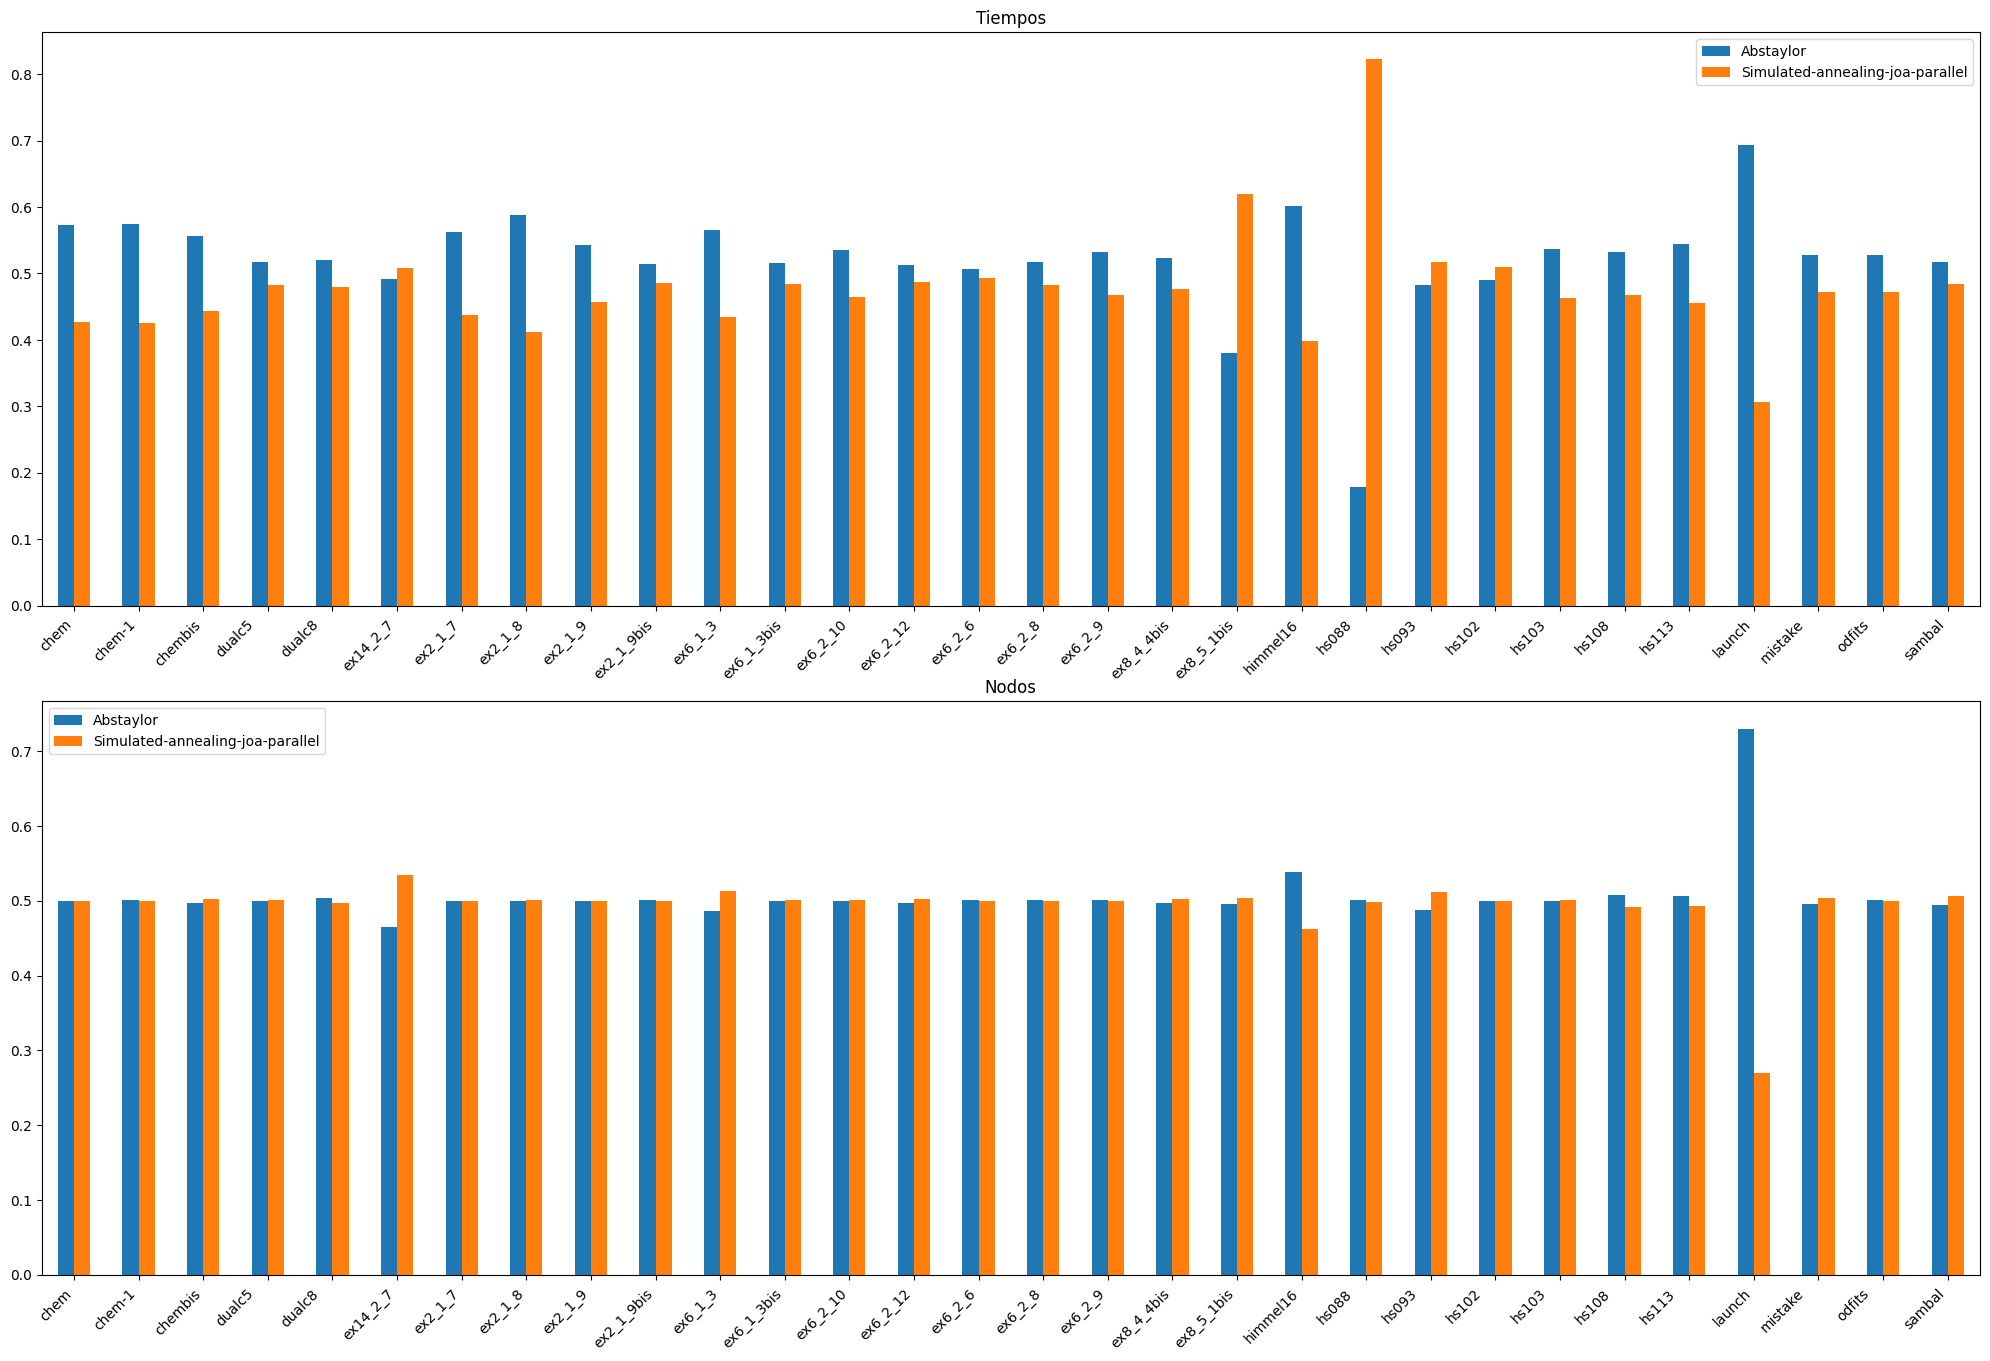

In [165]:
fig, axs = plt.subplots(2, 1, figsize=(20, 16))  # Aumenté la altura de la figura

data['Tiempos'].plot(kind='bar', ax=axs[0])
data['Nodos'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Tiempos')
axs[1].set_title('Nodos')

# Rotar y alinear las etiquetas del eje X
for ax in axs:
    ax.set_xticklabels(problemas, rotation=45, ha='right')
    ax.tick_params(axis='x', which='major', pad=5)  # Aumentar el espacio entre las etiquetas y el eje

# Ajustar el espacio entre los subplots y los bordes de la figura
plt.tight_layout()

# Añadir más espacio en la parte inferior para las etiquetas
plt.subplots_adjust(bottom=0.2)

plt.show()

In [166]:
# Sacar diferencia % entre columnas
for sheet in sheet_names:
    data[sheet]['Diferencia'] = data[sheet].diff(axis=1).iloc[:, -1] * 100

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing-joa-parallel  Diferencia
 0    0.573409                          0.426591  -14.681888
 1    0.574677                          0.425323  -14.935460
 2    0.557034                          0.442966  -11.406714
 3    0.517254                          0.482746   -3.450781
 4    0.520204                          0.479796   -4.040747
 5    0.491670                          0.508330    1.666011
 6    0.563005                          0.436995  -12.601046
 7    0.587806                          0.412194  -17.561230
 8    0.542361                          0.457639   -8.472222
 9    0.513928                          0.486072   -2.785641
 10   0.565081                          0.434919  -13.016280
 11   0.515409                          0.484591   -3.081733
 12   0.535844                          0.464156   -7.168777
 13   0.512278                          0.487722   -2.455546
 14   0.507171                          0.492829   -1.434104
 15   0.51788

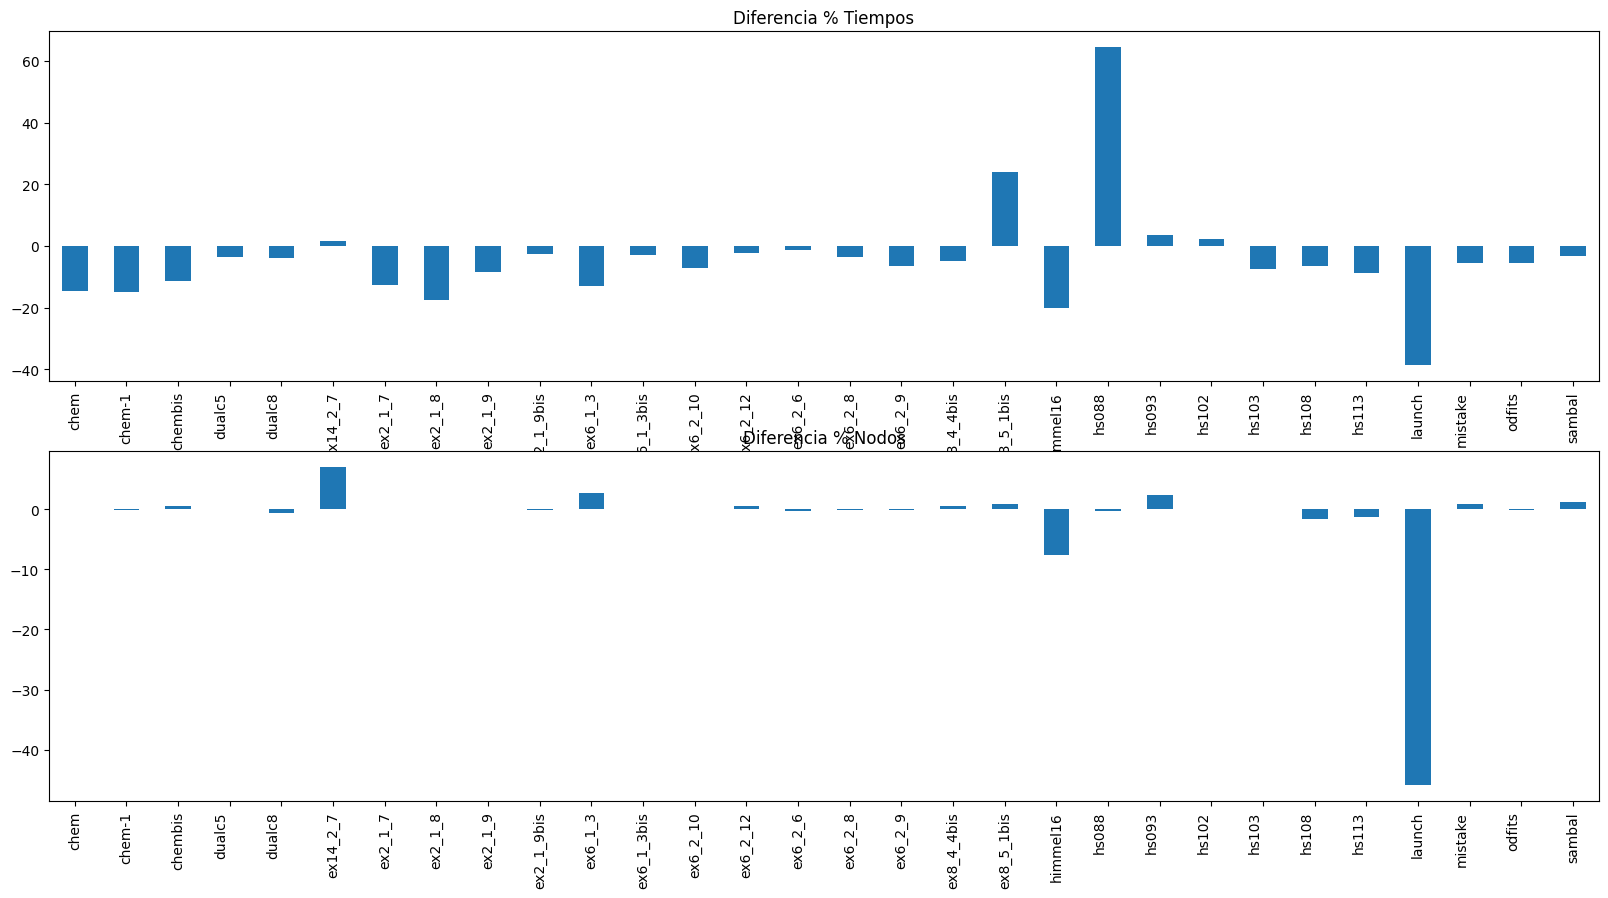

In [167]:
# graficar diferencias
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos']['Diferencia'].plot(kind='bar', ax=axs[0])
data['Nodos']['Diferencia'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Diferencia % Tiempos')
axs[1].set_title('Diferencia % Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()

In [168]:
# sacar promedio de diferencias
promedio_diferencias = {sheet: data[sheet]['Diferencia'].mean() for sheet in sheet_names}
promedio_diferencias

{'Tiempos': -4.415517764787376, 'Nodos': -1.360562769097551}

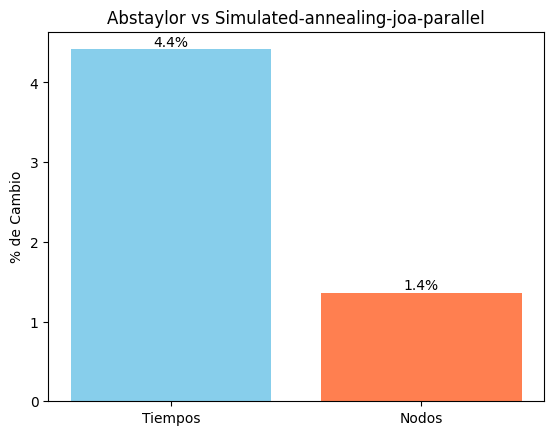

In [169]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Multiplicar los promedios por -1
promedio_diferencias_negativos = {k: -v for k, v in promedio_diferencias.items()}

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_diferencias_negativos.keys(), promedio_diferencias_negativos.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('% de Cambio')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}%', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

In [170]:
# Calculo de Speed Up
for sheet in sheet_names:
    data[sheet]['Speed Up'] = data[sheet][columnas[0]] / data[sheet][columnas[1]]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing-joa-parallel  Diferencia  Speed Up
 0    0.573409                          0.426591  -14.681888  1.344168
 1    0.574677                          0.425323  -14.935460  1.351156
 2    0.557034                          0.442966  -11.406714  1.257507
 3    0.517254                          0.482746   -3.450781  1.071482
 4    0.520204                          0.479796   -4.040747  1.084218
 5    0.491670                          0.508330    1.666011  0.967226
 6    0.563005                          0.436995  -12.601046  1.288357
 7    0.587806                          0.412194  -17.561230  1.426043
 8    0.542361                          0.457639   -8.472222  1.185129
 9    0.513928                          0.486072   -2.785641  1.057309
 10   0.565081                          0.434919  -13.016280  1.299281
 11   0.515409                          0.484591   -3.081733  1.063594
 12   0.535844                          0.464156   -7.168777  1.15

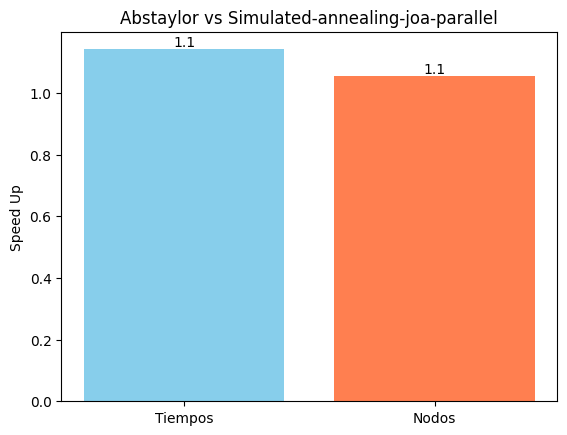

In [171]:
# Promedio de Speed Up
promedio_speed_up = {sheet: data[sheet]['Speed Up'].mean() for sheet in sheet_names}
promedio_speed_up

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_speed_up.keys(), promedio_speed_up.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('Speed Up')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

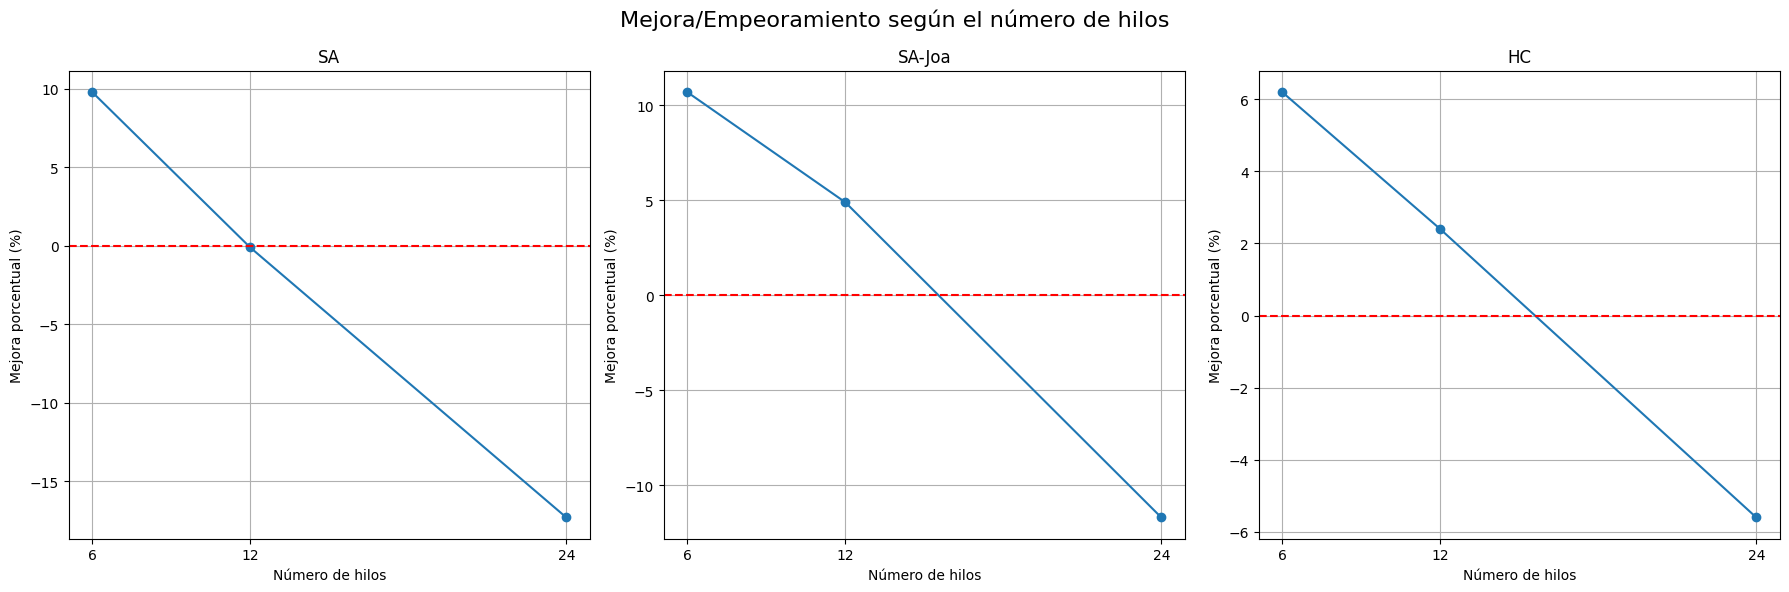

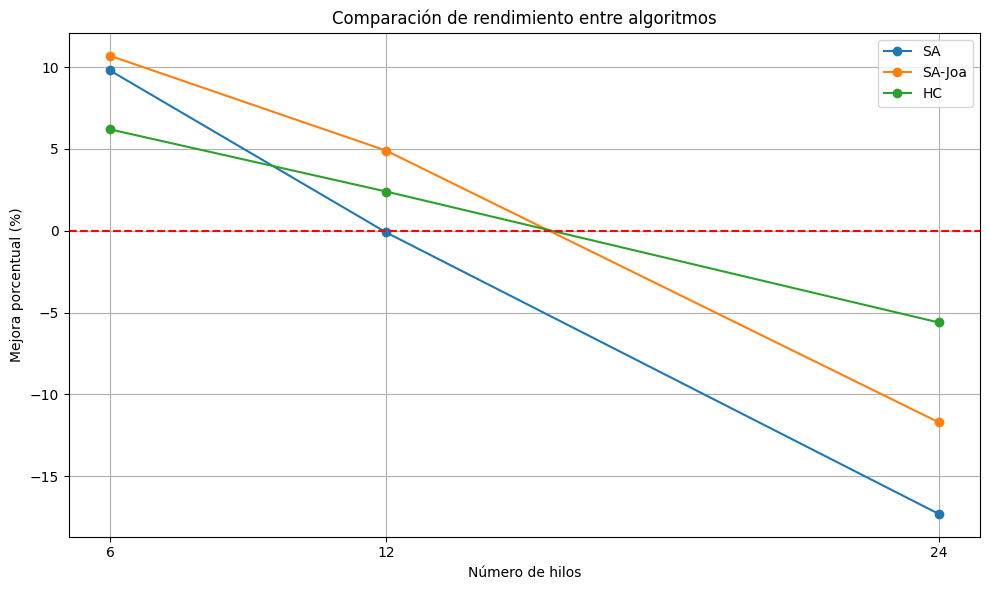

In [172]:
import matplotlib.pyplot as plt
import numpy as np


# Datos
algorithms = ['SA', 'SA-Joa', 'HC']
threads = [6, 12, 24]

# Mejora porcentual
improvement_data = {
    'SA': [9.8, -0.1, -17.3],
    'SA-Joa': [10.7, 4.9, -11.7],
    'HC': [6.2, 2.4, -5.6]
}

# Crear una figura con tres subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Mejora/Empeoramiento según el número de hilos', fontsize=16)

# Función para crear gráfico
def create_graph(ax, data, title):
    ax.plot(threads, data, marker='o')
    ax.set_xlabel('Número de hilos')
    ax.set_ylabel('Mejora porcentual (%)')
    ax.set_title(title)
    ax.set_xticks(threads)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.grid(True)

# Crear gráficos para cada algoritmo
create_graph(ax1, improvement_data['SA'], 'SA')
create_graph(ax2, improvement_data['SA-Joa'], 'SA-Joa')
create_graph(ax3, improvement_data['HC'], 'HC')

plt.tight_layout()
plt.show()

# Gráfico combinado
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(threads, improvement_data[alg], marker='o', label=alg)

plt.xlabel('Número de hilos')
plt.ylabel('Mejora porcentual (%)')
plt.title('Comparación de rendimiento entre algoritmos')
plt.legend()
plt.xticks(threads)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

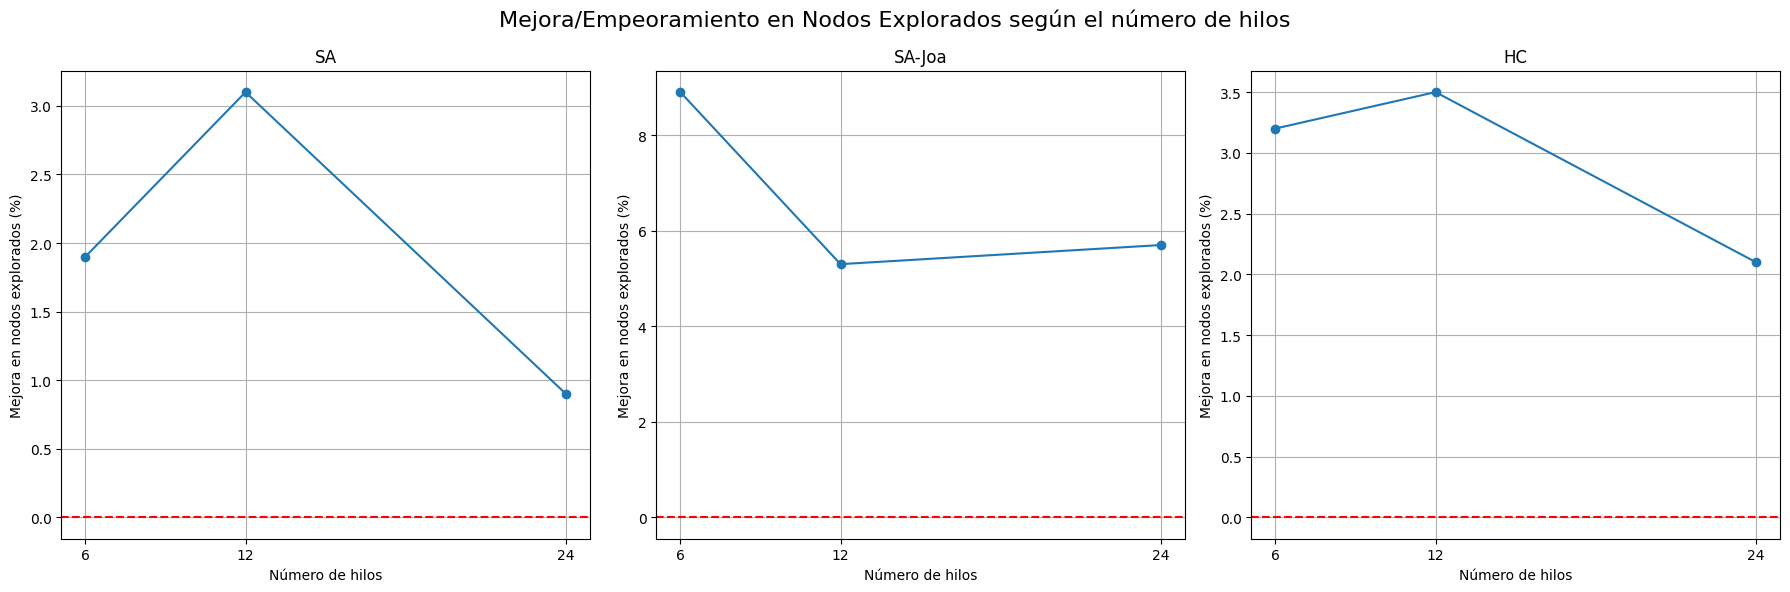

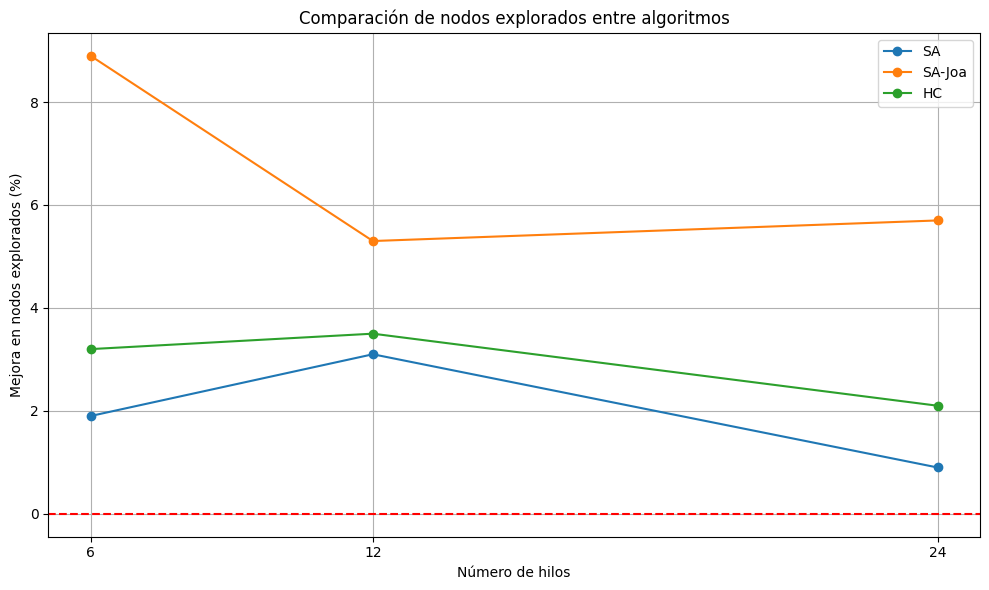

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
algorithms = ['SA', 'SA-Joa', 'HC']
threads = [6, 12, 24]

# Mejora porcentual en nodos explorados
# Nota: Estos son valores hipotéticos. Reemplázalos con tus datos reales.
nodes_improvement_data = {
    'SA': [1.9, 3.1, 0.9],
    'SA-Joa': [8.9, 5.3, 5.7],
    'HC': [3.2, 3.5, 2.1]
}

# Crear una figura con tres subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Mejora/Empeoramiento en Nodos Explorados según el número de hilos', fontsize=16)

# Función para crear gráfico
def create_graph(ax, data, title):
    ax.plot(threads, data, marker='o')
    ax.set_xlabel('Número de hilos')
    ax.set_ylabel('Mejora en nodos explorados (%)')
    ax.set_title(title)
    ax.set_xticks(threads)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.grid(True)

# Crear gráficos para cada algoritmo
create_graph(ax1, nodes_improvement_data['SA'], 'SA')
create_graph(ax2, nodes_improvement_data['SA-Joa'], 'SA-Joa')
create_graph(ax3, nodes_improvement_data['HC'], 'HC')

plt.tight_layout()
plt.show()

# Gráfico combinado
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(threads, nodes_improvement_data[alg], marker='o', label=alg)

plt.xlabel('Número de hilos')
plt.ylabel('Mejora en nodos explorados (%)')
plt.title('Comparación de nodos explorados entre algoritmos')
plt.legend()
plt.xticks(threads)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()